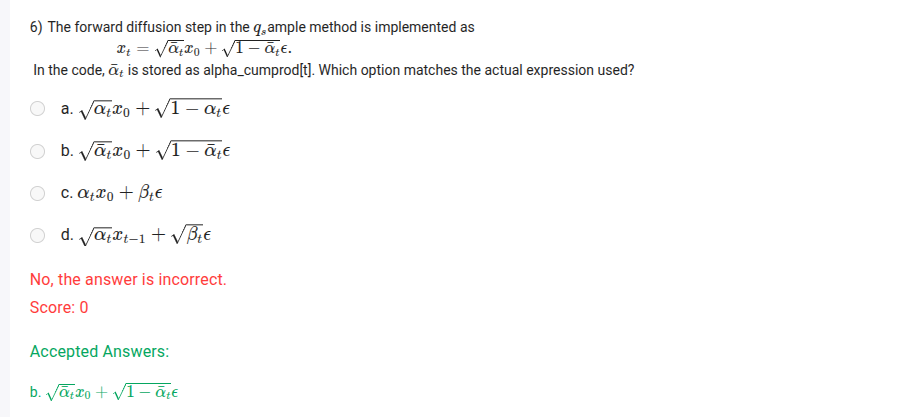

# What is forward diffusion step in the qs sample method

The **forward diffusion step** in the **$q_s$ sample method** (used in **Diffusion Models**, especially in Denoising Diffusion Probabilistic Models or DDPMs) refers to the process of **gradually adding noise** to a data sample over time to turn it into pure noise. This simulates a **Markov process** where data is diffused over several time steps.

---

### 🔁 Forward Diffusion Process (also called the **noising process**):

In mathematical terms, for each timestep $t$, the forward diffusion process is defined as:

$$
q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1 - \alpha_t) \mathbf{I})
$$

But you can also express $x_t$ directly in terms of the original data $x_0$:

$$
x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \epsilon
$$

Where:

* $x_0$: the original clean image or data
* $\epsilon \sim \mathcal{N}(0, \mathbf{I})$: standard Gaussian noise
* $\bar{\alpha}_t = \prod_{s=1}^{t} \alpha_s$: the cumulative product of noise scaling factors
* $x_t$: the noisy version of $x_0$ at time step $t$

---

### 🧠 Intuition

* Start with real data $x_0$
* At each step, inject small Gaussian noise:

  * $x_1$ is a little noisy version of $x_0$
  * $x_2$ is noisier than $x_1$
  * ...
  * $x_T \approx \mathcal{N}(0, I)$ (pure noise)

This is called the **forward diffusion** because it goes **from data to noise**.

---

### 🔄 Later: Reverse Sampling

In the **reverse diffusion process**, the model learns how to **denoise** the pure noise back into data.

---

# Solution -> Read the above explanation

You're absolutely right to go with:

**✅ b.**  **$x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \epsilon$**

### Explanation:

In the **forward diffusion process** of Denoising Diffusion Probabilistic Models (DDPM), the data $x_0$ is gradually noised over time steps $t$. The forward equation used to sample a noisy version $x_t$ is:

$$
x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
$$

Here:

* $\bar{\alpha}_t = \prod_{s=1}^t \alpha_s$ is the **cumulative product** of the noise schedule $\alpha_s = 1 - \beta_s$
* $\epsilon$ is standard Gaussian noise
* This lets you **directly sample $x_t$ from $x_0$** without needing intermediate steps

In the code, this is typically:

```python
x_t = sqrt_alpha_cumprod[t] * x_0 + sqrt(1 - alpha_cumprod[t]) * epsilon
```

So, option **b** matches perfectly.
Other options either use incorrect variables or describe other steps like the reverse process.
